In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
data = pd.read_csv(r'F:\loan prediction\train1.csv')

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [307]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Filling the Nan value and Converting the Categorical Features into Numerical Feature 

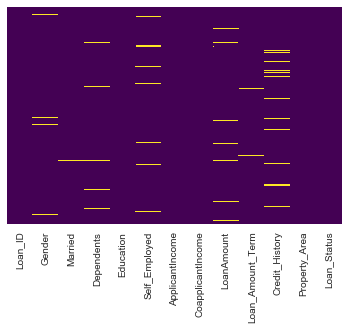

In [308]:
sns.heatmap(data.isnull(),yticklabels = False , cbar = False, cmap = 'viridis')

In [309]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Loan_Status']=le.fit_transform(data['Loan_Status'])


In [310]:
data.Gender = data.Gender.fillna(data.Gender.mode()[0])

In [311]:
data.Dependents = data.Dependents.fillna(data.Dependents.mode()[0])

In [312]:
data.Self_Employed = data.Self_Employed.fillna(data.Self_Employed.mode()[0])

In [313]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.median())

In [314]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0])

In [315]:
data.Credit_History = data.Credit_History.fillna(data.Credit_History.mode()[0])

In [316]:
test  = pd.read_csv('loantest1.csv')

In [317]:
finaldf = pd.concat([data,test],axis = 0)

In [318]:
finaldf = pd.get_dummies(finaldf,drop_first = True, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [319]:
finaldf

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,1.0,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0.0,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1.0,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1.0,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,4009,1777.0,113.0,360.0,1.0,NaN,1,1,0,0,1,1,1,0,1
363,LP002975,4158,709.0,115.0,360.0,1.0,NaN,1,1,0,0,0,0,0,0,1
364,LP002980,3250,1993.0,126.0,360.0,1.0,NaN,1,0,0,0,0,0,0,1,0
365,LP002986,5000,2393.0,158.0,360.0,1.0,NaN,1,1,0,0,0,0,0,0,0


In [320]:
finaldf =finaldf.drop(['Loan_ID'],axis = 1)

# Data Visualisation 

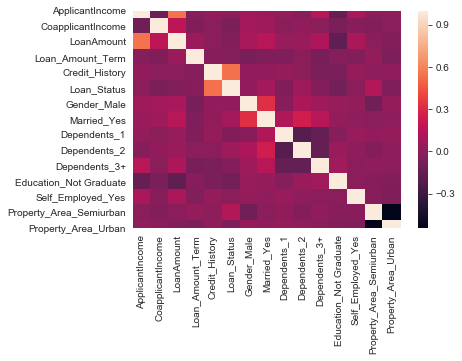

In [321]:
sns.heatmap(finaldf.corr())

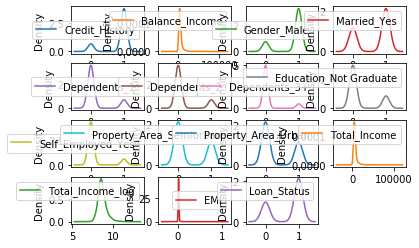

In [250]:
finaldf.plot(kind='density', subplots=True, \
             layout=(4,4), sharex=False)
plt.show()

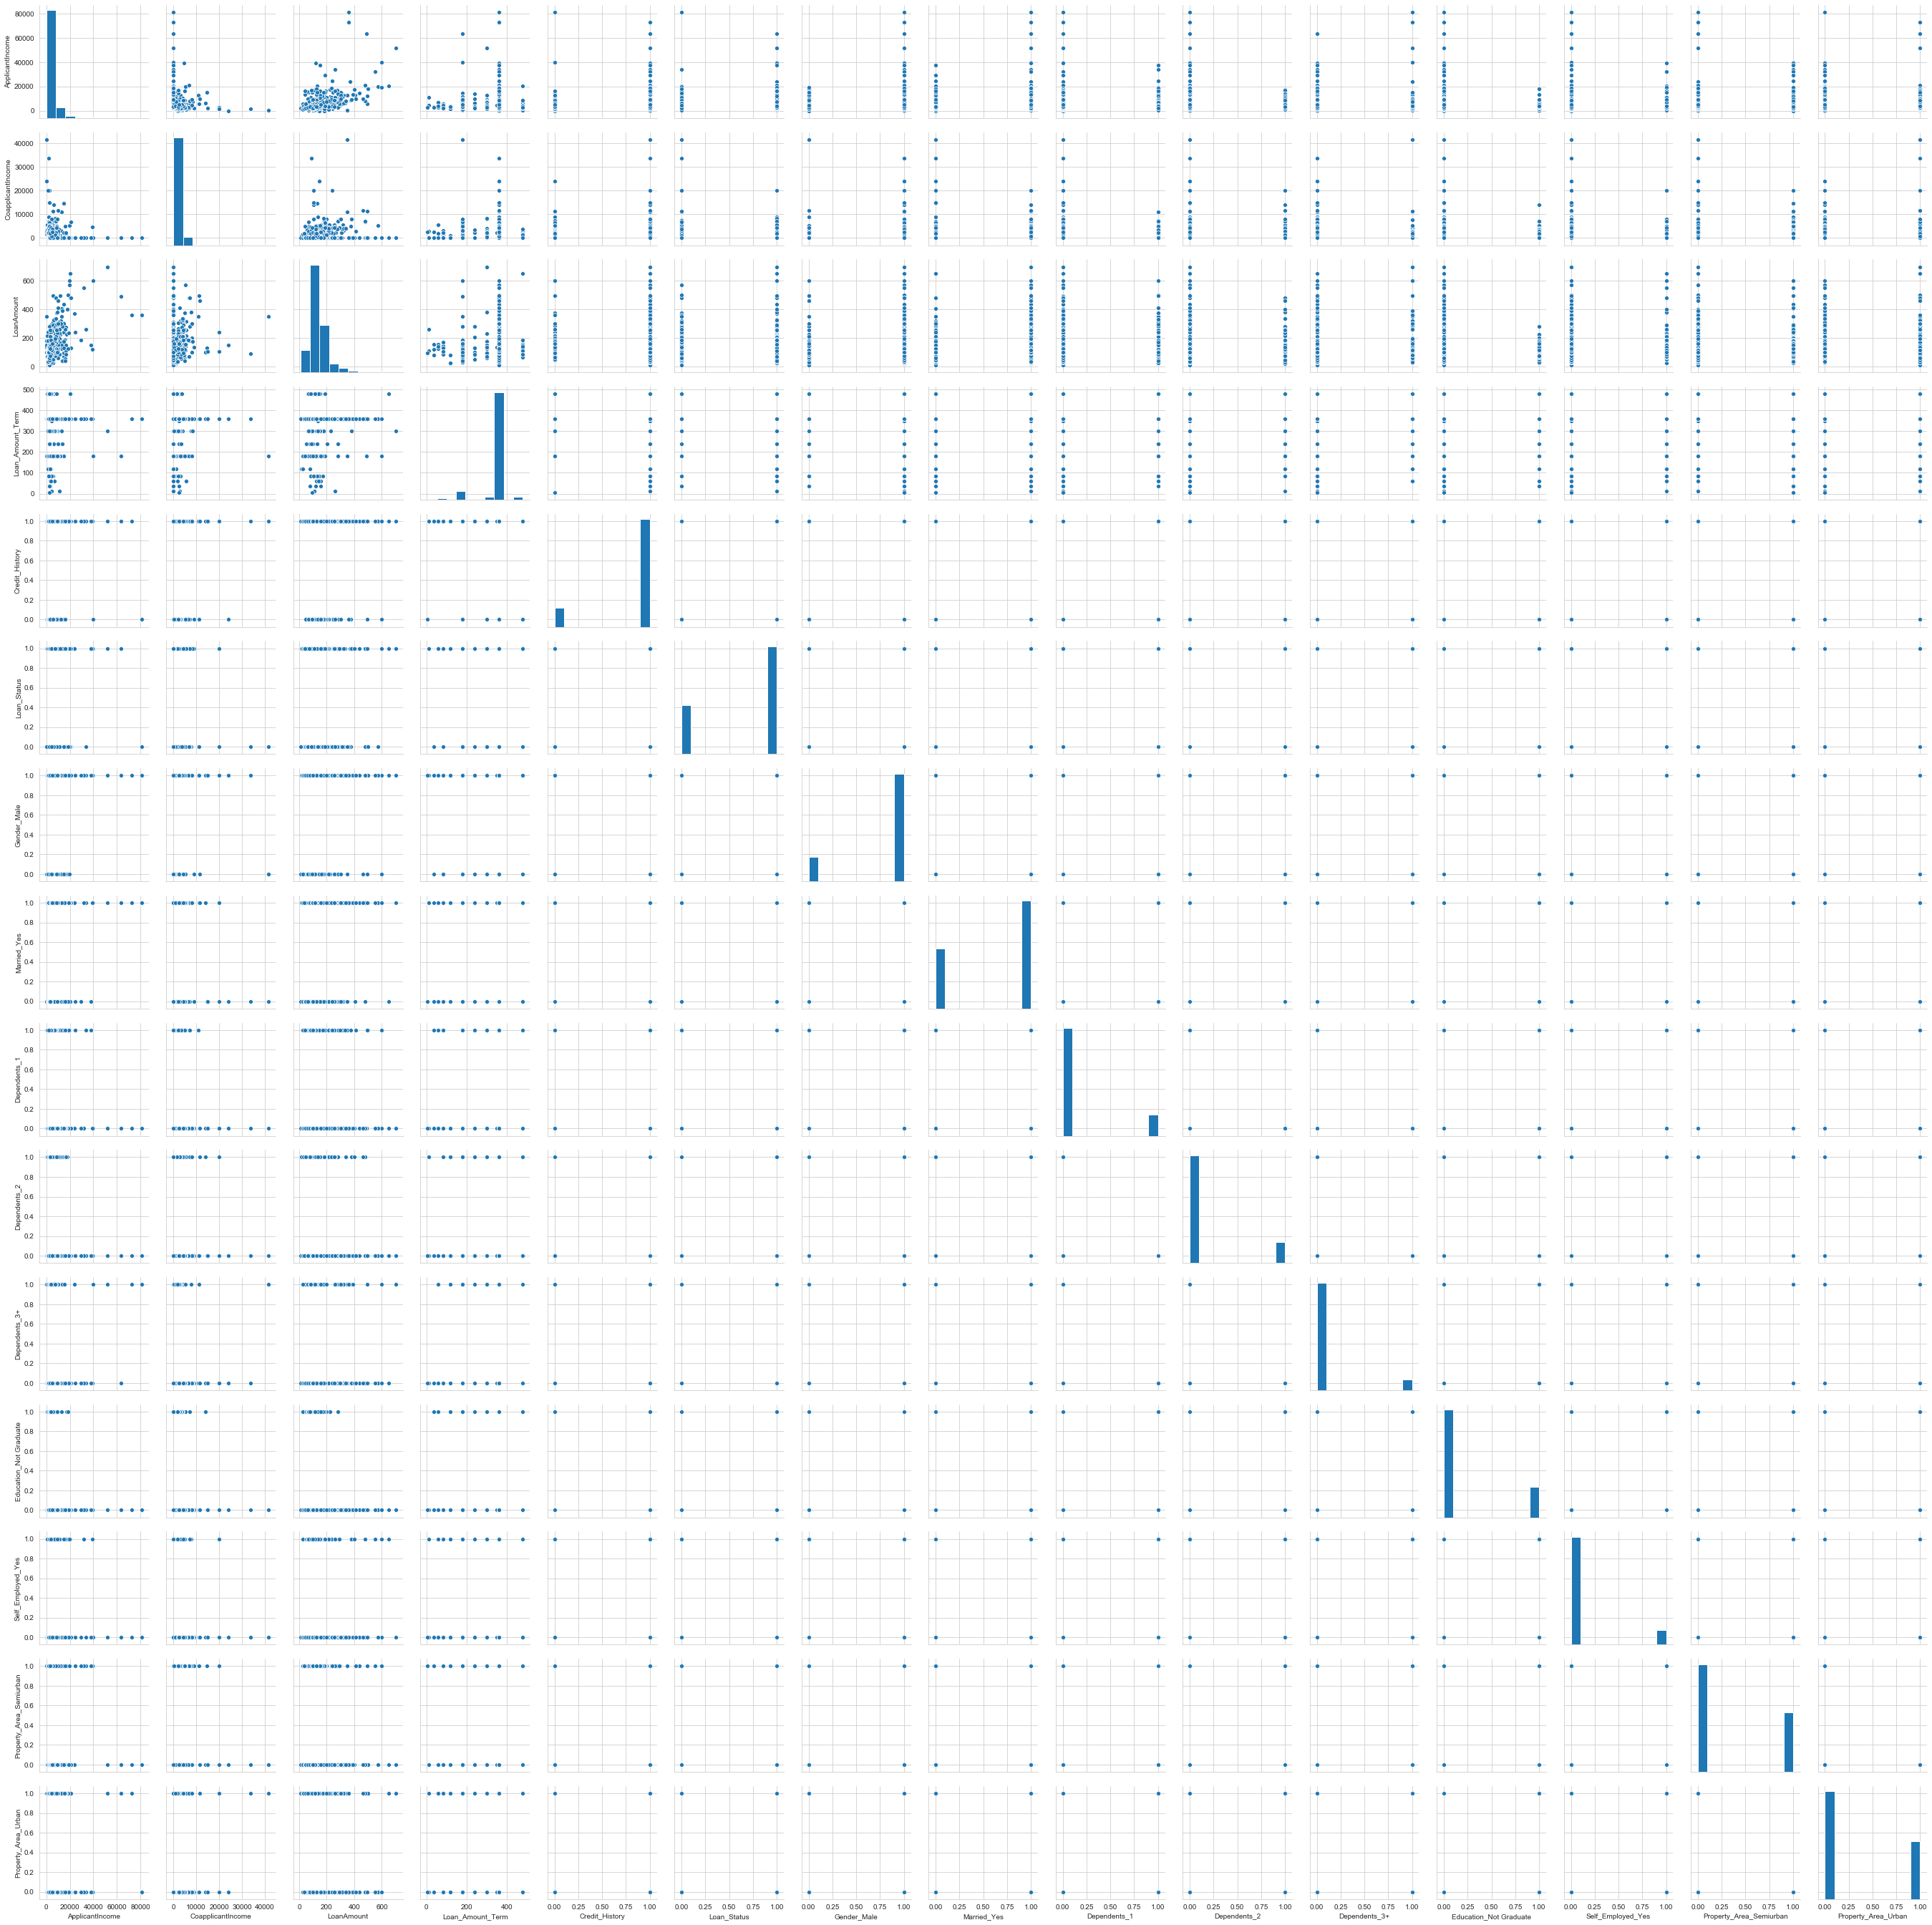

In [275]:
sns.pairplot(data = finaldf)

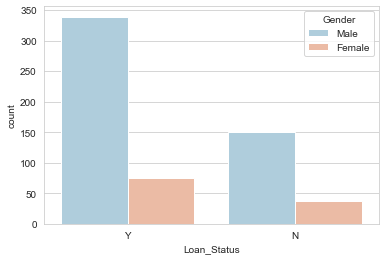

In [251]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Gender',data=data, palette='RdBu_r')

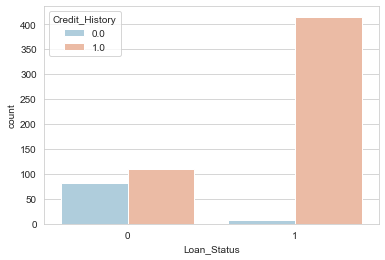

In [274]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Credit_History',data=data, palette='RdBu_r')

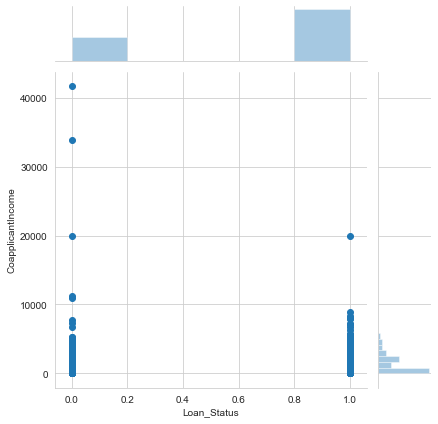

In [277]:
sns.set_style('whitegrid')
sns.jointplot(y='CoapplicantIncome',x = 'Loan_Status',data=data)

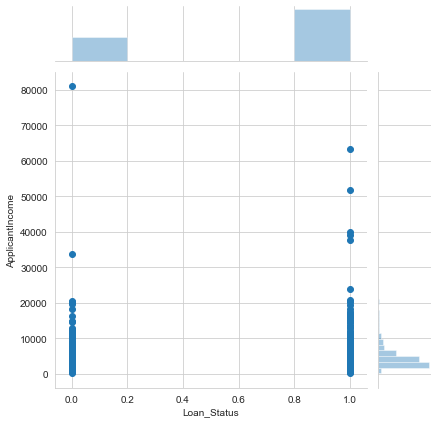

In [280]:
sns.set_style('whitegrid')
sns.jointplot(y='ApplicantIncome',x = 'Loan_Status',data=data)

<function matplotlib.pyplot.show(*args, **kw)>

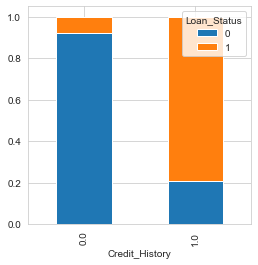

In [281]:
Credit_History = pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True,figsize = (4,4))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

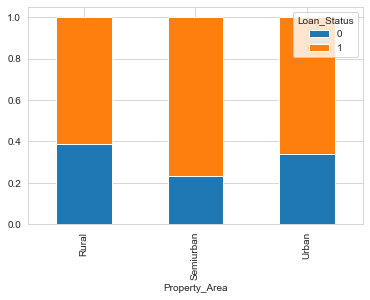

In [284]:
Property_Area = pd.crosstab(data['Property_Area'],data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked = True)
plt.show

# From pairplot data distribution in LoanAmount is towards left that means it is not normally distributed hence we take log normal of Loan_amount

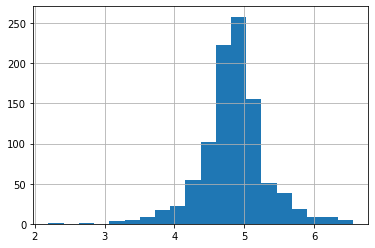

In [202]:
finaldf['LoanAmount'] = np.log(finaldf['LoanAmount'])
finaldf['LoanAmount'].hist(bins = 20)

In [206]:
finaldf

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,4.852030,360.0,1.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,4.852030,360.0,1.0,0.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,4.189655,360.0,1.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,4.787492,360.0,1.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,4.948760,360.0,1.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,4.727388,360.0,1.0,NaN,1,1,0,0,1,1,1,0,1
363,4158,709.0,4.744932,360.0,1.0,NaN,1,1,0,0,0,0,0,0,1
364,3250,1993.0,4.836282,360.0,1.0,NaN,1,0,0,0,0,0,0,1,0
365,5000,2393.0,5.062595,360.0,1.0,NaN,1,1,0,0,0,0,0,0,0


# Feature engineering

# According to correlation matrix and pairplot we see that ApplicantIncome and CoapplicantIncome is correlated and skewed towards left hence we add them and take lognormal transformation of final income

In [207]:
finaldf['Total_Income'] = finaldf['ApplicantIncome'] + finaldf['CoapplicantIncome']

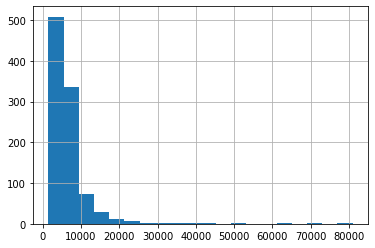

In [208]:
finaldf['Total_Income'].hist(bins = 20)

In [209]:
finaldf['Total_Income_log'] = np.log(finaldf['Total_Income'])

In [210]:
finaldf['EMI'] = finaldf['LoanAmount'] / finaldf['Loan_Amount_Term']

In [211]:
finaldf['Balance_Income'] = finaldf['Total_Income'] - (finaldf['EMI']*100)

In [323]:
finaldf = finaldf.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1)

In [217]:
finaldf

,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,1.0,1,0,0,0,0,0,0,0,1,5849.0,8.674026,0.013478,5847.652214
1,1.0,0.0,1,1,1,0,0,0,0,0,0,6091.0,8.714568,0.013478,6089.652214
2,1.0,1.0,1,1,0,0,0,0,1,0,1,3000.0,8.006368,0.011638,2998.836207
3,1.0,1.0,1,1,0,0,0,1,0,0,1,4941.0,8.505323,0.013299,4939.670141
4,1.0,1.0,1,0,0,0,0,0,0,0,1,6000.0,8.699515,0.013747,5998.625344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,NaN,1,1,0,0,1,1,1,0,1,5786.0,8.663196,0.013132,5784.686837
363,1.0,NaN,1,1,0,0,0,0,0,0,1,4867.0,8.490233,0.013180,4865.681963
364,1.0,NaN,1,0,0,0,0,0,0,1,0,5243.0,8.564649,0.013434,5241.656588
365,1.0,NaN,1,1,0,0,0,0,0,0,0,7393.0,8.908289,0.014063,7391.593724


In [218]:
titles = list(finaldf.columns)
titles

['Credit_History',
 'Loan_Status',
 'Gender_Male',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Total_Income',
 'Total_Income_log',
 'EMI',
 'Balance_Income']

In [219]:
titles[1],titles[14] = titles[14] ,titles[1]

In [220]:
finaldf = finaldf[titles]

In [221]:
finaldf

,Credit_History,Balance_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Loan_Status
0,1.0,5847.652214,1,0,0,0,0,0,0,0,1,5849.0,8.674026,0.013478,1.0
1,1.0,6089.652214,1,1,1,0,0,0,0,0,0,6091.0,8.714568,0.013478,0.0
2,1.0,2998.836207,1,1,0,0,0,0,1,0,1,3000.0,8.006368,0.011638,1.0
3,1.0,4939.670141,1,1,0,0,0,1,0,0,1,4941.0,8.505323,0.013299,1.0
4,1.0,5998.625344,1,0,0,0,0,0,0,0,1,6000.0,8.699515,0.013747,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,5784.686837,1,1,0,0,1,1,1,0,1,5786.0,8.663196,0.013132,NaN
363,1.0,4865.681963,1,1,0,0,0,0,0,0,1,4867.0,8.490233,0.013180,NaN
364,1.0,5241.656588,1,0,0,0,0,0,0,1,0,5243.0,8.564649,0.013434,NaN
365,1.0,7391.593724,1,1,0,0,0,0,0,0,0,7393.0,8.908289,0.014063,NaN


# Dividing the final dataset into train and test dataset

In [223]:
df_train  = finaldf.iloc[:614,:]
df_test = finaldf.iloc[614:,:]

In [224]:
df_test.drop(['Loan_Status'],axis = 1,inplace = True)

In [ ]:
#

In [225]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [226]:
import warnings
warnings.simplefilter("ignore")

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X = df_train.drop('Loan_Status', axis=1)
Y = df_train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,Y, \
                                                    test_size=0.30, 
                                                    random_state=101)

In [229]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_sampl

In [325]:
from sklearn.model_selection import KFold, cross_val_score
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, \
                                  random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, \
                                                 y_train, cv=kfold, \
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)

LR: 81.34 ( 6.11)
LDA: 81.34 ( 6.11)
KNN: 65.05 ( 5.06)
CART: 72.03 ( 4.06)
NB: 81.11 ( 3.75)
SVM: 66.67 ( 5.98)


In [326]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [349]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lda,X_train,y_train,cv = 5)

In [350]:
score

array([0.79310345, 0.8372093 , 0.8372093 , 0.84705882, 0.76470588])

In [351]:
score.mean()

0.8158573517618756

In [347]:
lg_fit = lda.fit(X_train,y_train)

In [348]:
pred = lda.predict(df_test)

In [237]:
 pred=pd.DataFrame(pred)
sub_df=pd.read_csv('sam_lda.csv')
datasets=pd.concat([sub_df['Loan_ID'],pred],axis=1)
datasets.columns=['Loan_ID','Loan_Status']
datasets.to_csv('sample_sub_lda1.csv',index=False)

In [238]:
y = pd.read_csv('sample_sub_lda1.csv')

In [239]:
y['Loan_Status'] = y['Loan_Status'].map({1.0:'Y', 0.0:'N'})

In [240]:
y.to_csv('sample_sub_lda2.csv',index=False)